In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# 1. Dataset 
dataset $(x, y)$ qui contient 100 exemples, et une seule variable $x$


In [2]:
np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=1, noise=10)

In [3]:
print(f"x => {x.shape}, y => {y.shape}")

x => (100, 1), y => (100,)


In [4]:
y = y.reshape((100,1))
y.shape

(100, 1)

Création de la matrice X qui contient la colonne de Biais

In [5]:
X = np.hstack((x, np.ones((x.shape[0],1))))

In [6]:
X.shape

(100, 2)

création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires.

In [7]:
theta = np.random.randn(2,1)
theta

array([[-0.63743703],
       [-0.39727181]])

# 2. Linear Model
 $F = X.\theta$

In [8]:
def model(X, theta):
    return X.dot(theta)

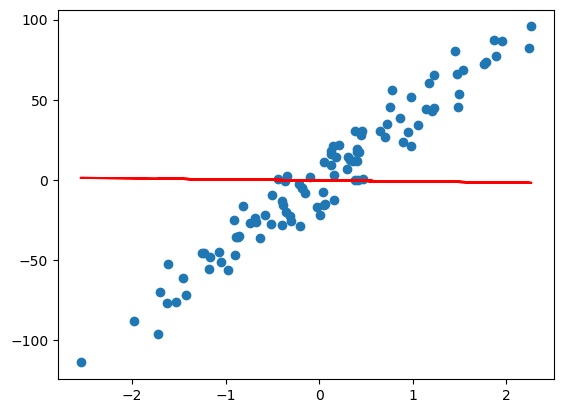

In [9]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='red')

# 3.Cost Function
les erreurs du modele sur le Dataset X, y en implémenter l'erreur quadratique moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [11]:
cost_function(X, y, theta)

1009.8259477174702

# 4. Descend Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [12]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [13]:
def descend_gradient(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Training

In [14]:
n_iterations = 1000
learning_rate = 0.01
final_theta, cost_history = descend_gradient(X, y, theta, learning_rate, n_iterations)

In [15]:
cost_function(X, y, final_theta)

57.08574532796593

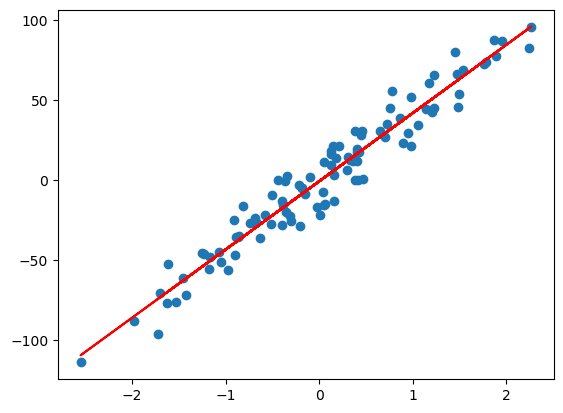

In [16]:
predictions = model(X, final_theta)
plt.scatter(x[:,0], y)
plt.plot(x[:,0], predictions, c = 'r')

# 6. Learning Chart 

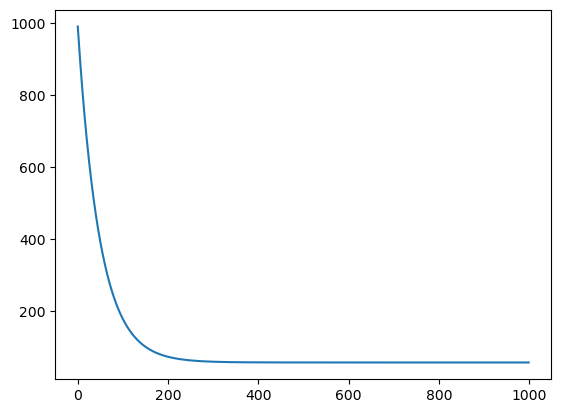

In [17]:
plt.plot(range(n_iterations), cost_history)

# 7. Final Model Validation
Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

$ R^2$ = 1 - $ \frac{\sum (y - f(x))^2}{\sum (y - mean(y))^2}  $

In [18]:
def determination_coef(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [19]:
determination_coef(y, predictions)

0.9417294704806692